### Preparation - Importing all necessary modules

In [70]:
# import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Display maximum rows and columns with pandas
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

### Data Collection - Loading the data sets

In [72]:
# Load the data set
df_for_loan = pd.read_csv("loan.csv")

In [73]:
df_for_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [74]:
df_for_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [75]:
df_for_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [76]:
df_for_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [77]:
df_for_loan.shape

(39717, 111)

### Inpecting the loan data, it has been found that we have 39717 rows and 111 columns.

### Now we intend to find the missing values on the data set and count along with the percentage so we understand the data in a better way.

In [78]:
# Checking for the number of missing values on the dataset
missing_values_count = df_for_loan.isnull().sum()

# Print the count of missing values
print(missing_values_count)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [79]:
# Checking the percentage of missing value on the dataset
missing_percentage = (missing_values_count / len(df_for_loan)) * 100

# Displaying the missing data count and percentage together
print(pd.DataFrame({'Total Missing': missing_values_count, 'Percentage': missing_percentage}).sort_values(by='Percentage', ascending=False))

                           Total Missing  Percentage
verification_status_joint          39717       100.0
annual_inc_joint                   39717       100.0
mo_sin_old_rev_tl_op               39717       100.0
mo_sin_old_il_acct                 39717       100.0
bc_util                            39717       100.0
...                                  ...         ...
delinq_amnt                            0         0.0
policy_code                            0         0.0
earliest_cr_line                       0         0.0
delinq_2yrs                            0         0.0
id                                     0         0.0

[111 rows x 2 columns]


### Data Cleaning - It has been found that we have greater number of null values in the Dataset. So, we will  remove the null values.

In [80]:
# Drop the columns with null value
df_for_loan.dropna(axis=1, how="any", subset=None, inplace=True)

df_for_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [81]:
# Checking and printing duplicated rows
print(f"Number of duplicate rows: {df_for_loan.duplicated().sum()}")

Number of duplicate rows: 0


In [82]:
df_for_loan.shape

(39717, 43)

### Let us find out the loan status for fully accepted loan

In [83]:
df_for_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Since we want to understand the problem areas leading to default. And the Current loans are ongoing and will not add any value to our analysis so we will drop them

In [84]:
# Exclude 'Current' loans from the dataset
df_for_loan = df_for_loan[df_for_loan['loan_status'] != 'Current']

# Verify the counts of 'loan_status'
print(df_for_loan['loan_status'].value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64


In [85]:
df_for_loan.shape

(38577, 43)

In [86]:
df_for_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0


In [87]:
# Identify columns with constant values

constant_columns = df_for_loan.columns[df_for_loan.nunique() <= 1].tolist()

print("Constant columns to drop:", constant_columns)

Constant columns to drop: ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [88]:
# Dropping the columns which are having the same value
df_for_loan.drop(columns=constant_columns, inplace=True)

In [89]:
df_for_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03


In [90]:
df_for_loan.shape

(38577, 35)

In [91]:
df_for_loan = df_for_loan.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

In [92]:
# Convert term column to int type
df_for_loan['term'] = df_for_loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [93]:
# Convert int_rate column to float type
df_for_loan['int_rate'] = df_for_loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

### Univerate analysis 

### We will now perform analysis on individual variables to understand their distributions, detect outliers, and gain insights.

### Lets explore the distribution of continuous variables such as loan_amnt, int_rate, annual_inc and dti

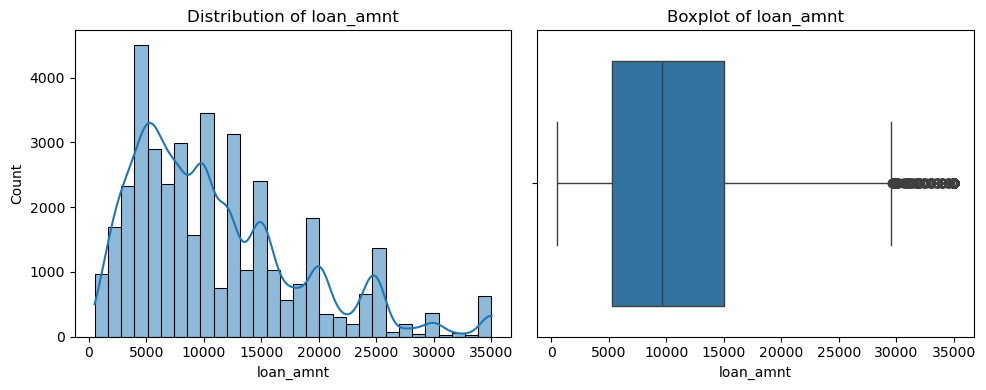

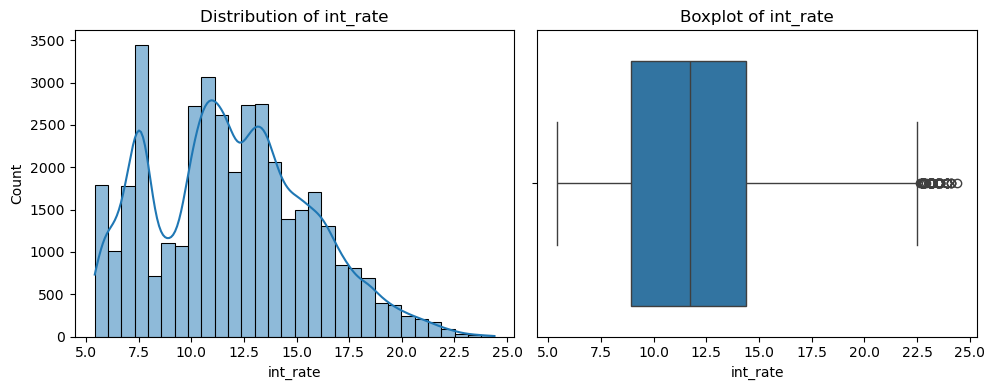

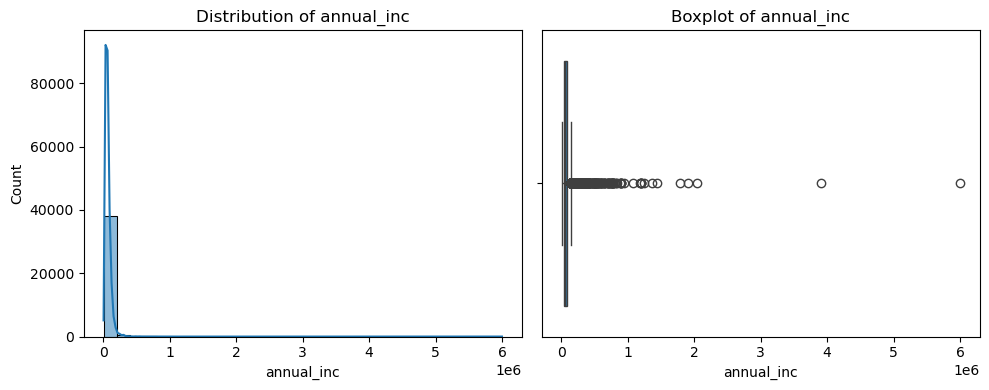

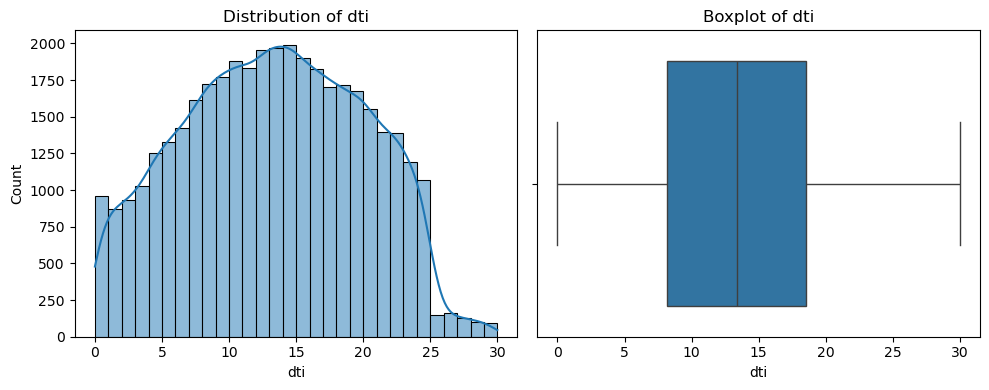

In [94]:
# List of numerical variables to plot
numerical_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']

# Plot histograms and boxplots
for var in numerical_vars:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df_for_loan[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_for_loan[var])
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
    plt.show()

### Following are the analysis that can be observed -

 1. Loan Amount - Majority of the loans falls between 5000 to 15000 dollars range but the higher loan amount could correlate with higher risks of default hence outliers observed.
 2. Interest Rate - Interest Rate are distributed across but it has been found most of it found in 5.0 to 15.0 interest rate with the peak on 7.5%
 3. Annual Income - It has been found that there are heavy outliers with very high incomes so we can consider that majority of borrowers have incomes below $100,000.
 4. DTI - The Debit to Income is most distributed with most values between 10% to 15 %. Higher DTI could mean that there is more stress to the borrower

### Now Lets us explore the categorical variables such as grade, sub_grade, home_ownership and purpose

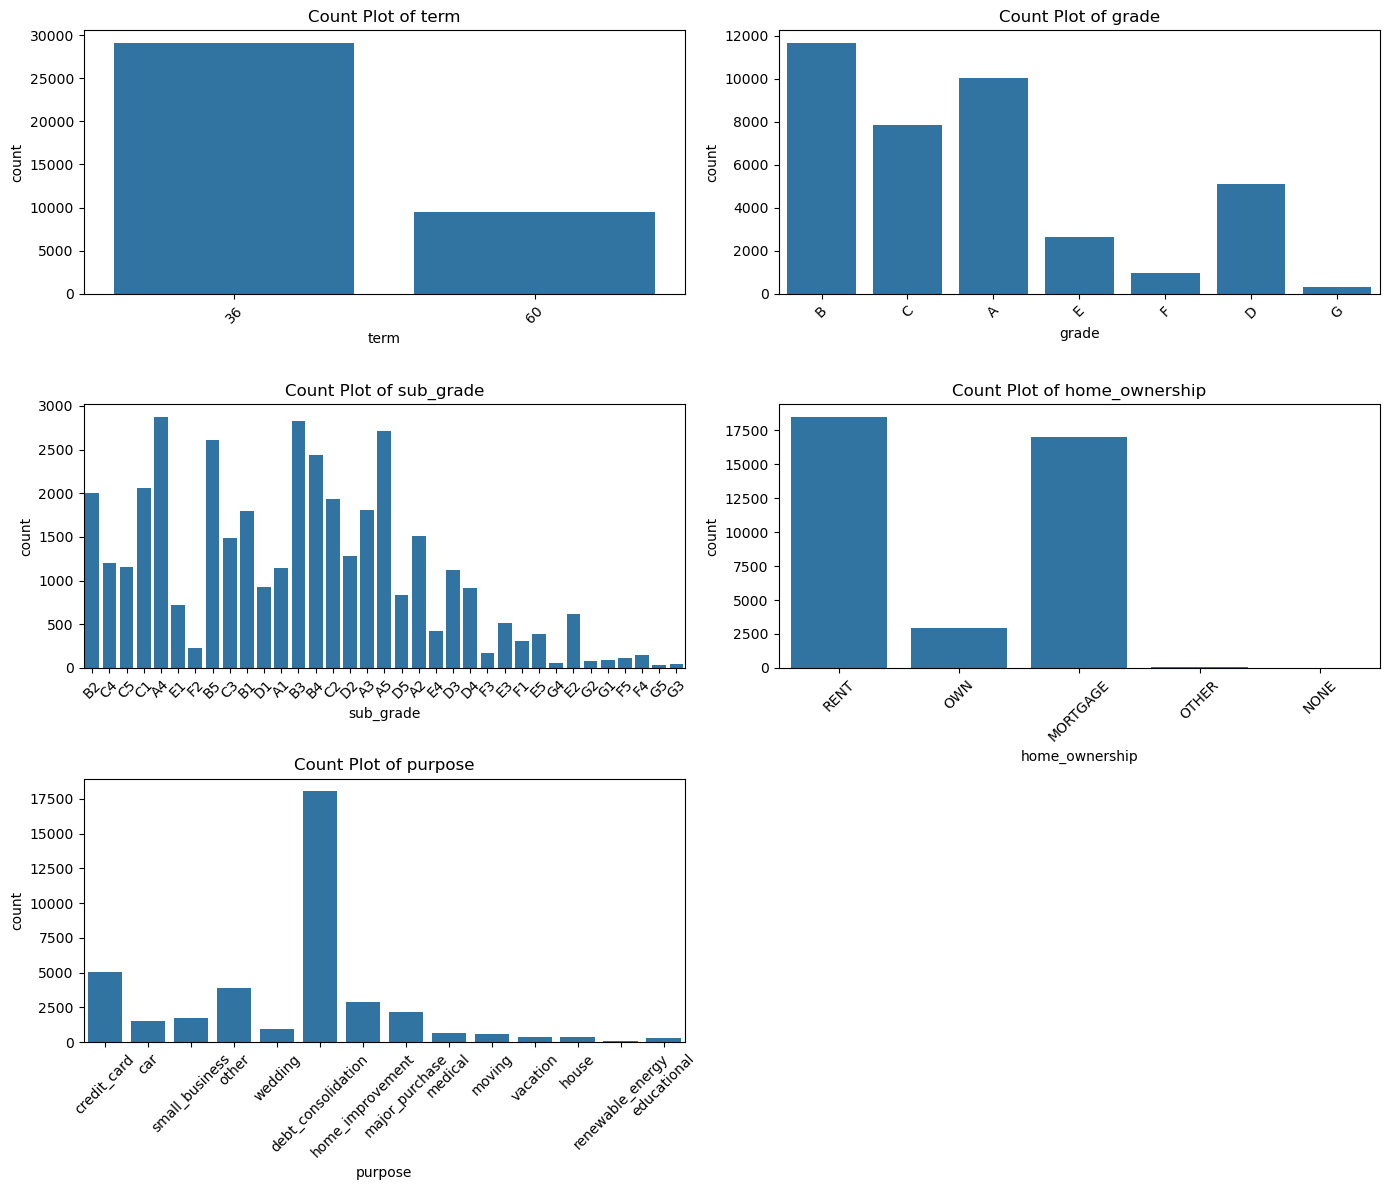

In [112]:
# List of categorical variables to plot
categorical_vars = ['term', 'grade', 'sub_grade', 'home_ownership', 'purpose']

# Plot count plots for each categorical variable (2 plots per row)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df_for_loan, ax=axes[i])
    axes[i].set_title(f'Count Plot of {var}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove extra subplot if necessary
if len(categorical_vars) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Following are the analysis that can be seen here -

1. Loan Term - Most loans taken are for shorter duration (36 months).
2. Grade - Majority of Loan are from B, C and A whereas lower Loan Grade which are D, E, F and G may have high risks associated with them.
3. Home Ownership - Most borrrowers are either RENT or have mortgage. Renters may pose higher risk to default in compairson to the ones who owns it or have a mortage on them.
4. Purpose - Debt Consolidation is the most common reasons for taking loan

### Bivariate Analysis

### Now let us understand the relationships of the these variables with target variables be it loan_status or loan_default.

### We will analyze if the variables like purpose, interest rate, loan_amout, home ownership could result to default.
### We will also analyze how these variables behave for borrowers who have been marked as Charged Off.

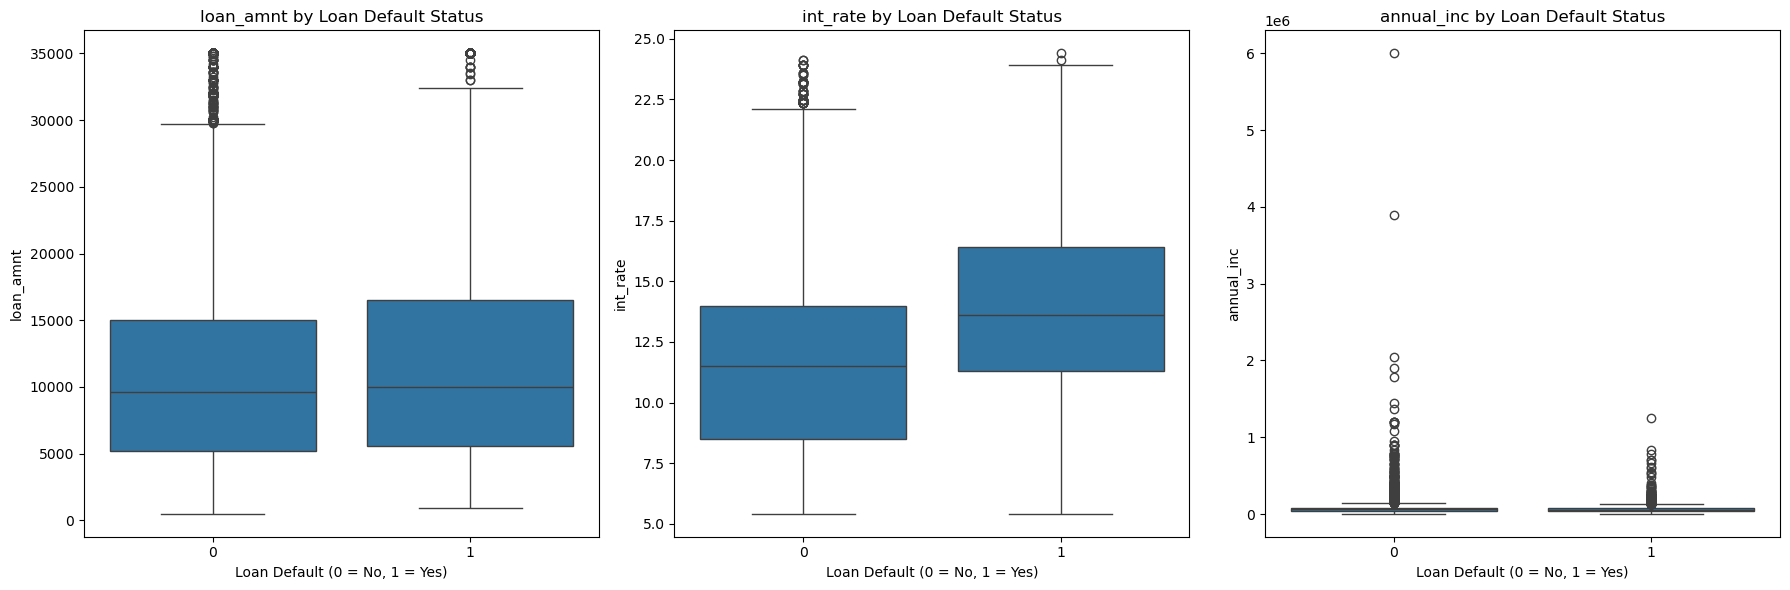

In [115]:
# Create a new binary target variable for loan default (1 = Charged Off, 0 = Fully Paid)
df_for_loan['loan_default'] = df_for_loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# List of numerical variables to plot
numerical_vars = ['loan_amnt', 'int_rate', 'annual_inc']

# Plot boxplots for numerical variables against loan default
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust ncols to the number of plots
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='loan_default', y=var, data=df_for_loan, ax=axes[i])
    axes[i].set_title(f'{var} by Loan Default Status')
    axes[i].set_xlabel('Loan Default (0 = No, 1 = Yes)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

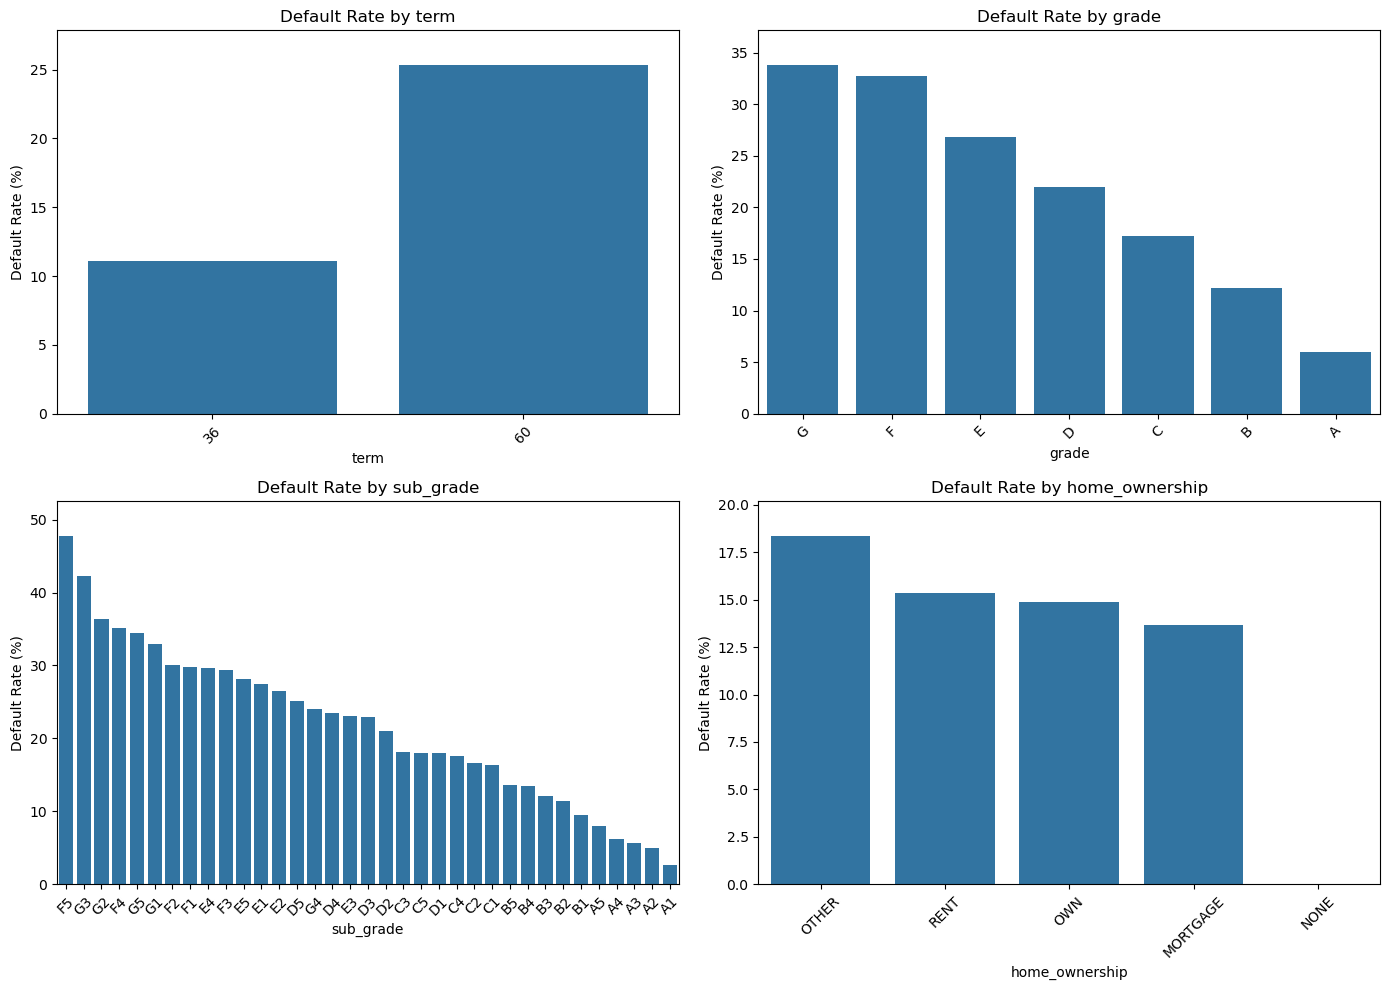

In [117]:
# Calculate default rates for categorical variables
categorical_vars = ['term', 'grade', 'sub_grade', 'home_ownership']

# Set up a figure with multiple subplots (side by side)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Adjust rows and cols as needed
axes = axes.flatten()

# Plot default rates for each categorical variable
for i, var in enumerate(categorical_vars):
    default_rate = df_for_loan.groupby(var)['loan_default'].mean().sort_values(ascending=False) * 100  # Convert to percentages
    sns.barplot(x=default_rate.index, y=default_rate.values, ax=axes[i])
    axes[i].set_title(f'Default Rate by {var}')
    axes[i].set_ylabel('Default Rate (%)')
    axes[i].set_ylim(0, default_rate.max() * 1.1)  # Set y-axis limit slightly higher than the max value
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Following are the analysis that can be seen -

1. Loan Term: Longer mortgage terms (60 months) are related to significantly better default quotes. This shows that longer-term loans pose extra chance.
2. Grade and Sub-Grade: Loan grade is a totally robust predictor of default danger. Lower grades (D, E, F, G) are much more likely to default, and this holds real at the sub-grade stage as well.
3. Interest Rate: Borrowers with higher interest charges are much more likely to default, reinforcing the concept that higher prices can be given to riskier borrowers.
4. Home Ownership: Renters and those classified as "OTHER" are much more likely to default than homeowners or those with mortgages.
5. Loan Purpose: Small business loans have the very best default fees, suggesting that this cause is in particular risky.


### Multivariate 
### It will enables us to find relationships among three or more variables at a time and get a deeper understanding of their interaction. 
### This will supply us greater sturdy insights into which mixtures of variables are most predictive of mortgage default.


### A correlation matrix will assist us understand the relationships among the numerical variables and take a look at if any are specifically correlated with one another or with the intention variable (loan_default). This can monitor multicollinearity or sturdy predictive relationships.

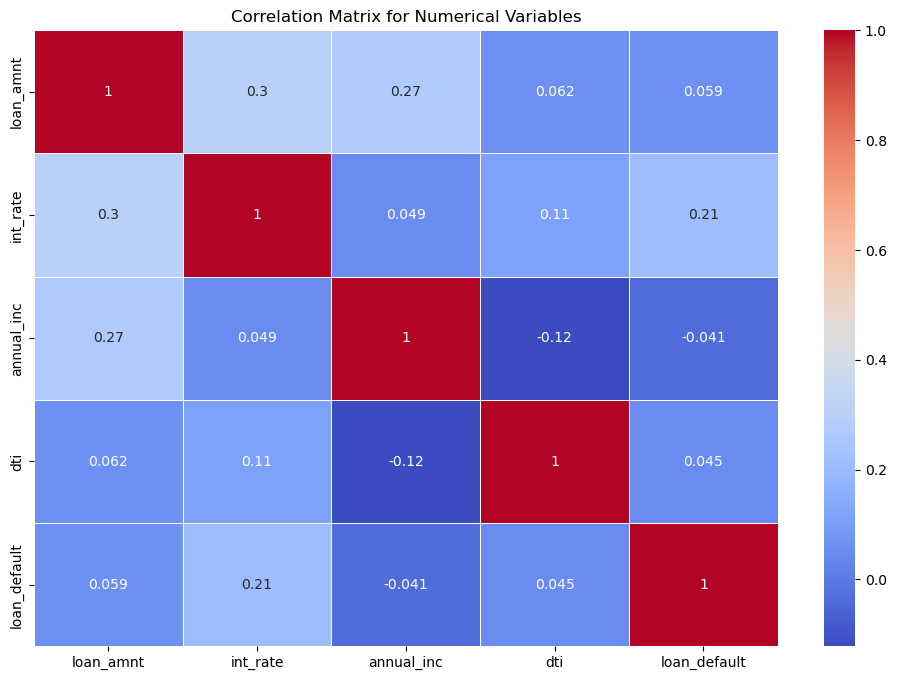

In [98]:
# Correlation matrix for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df_for_loan[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_default']].corr()

# Plotting a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### Post Analyzing the Correlation Matrix for Numerical Variables, we understand that -

### Loan quantity has weak positive correlation (0.059) with loan default. So we can understand that the loan amount does not influence loan default.
### There is a moderate positive correlation (0.21) between the interest rate and loan default. So, we can understand that - with increase in interest rates, there is a tendency to loan default. 
### The correlation between DTI and loan default is weak (0.045). hence it does not give any desired relationship on this dataset
### The annual income shows a slight negative correlation (-0.041) with loan default which gives us the impression that the higher-income borrowers are less likely to be default.

### Pairplot for Numerical Variables

A pairplot can visually show how specific numerical variables interact with every other, at the equal time as highlighting the distribution of loan_default (the use of shade coding).

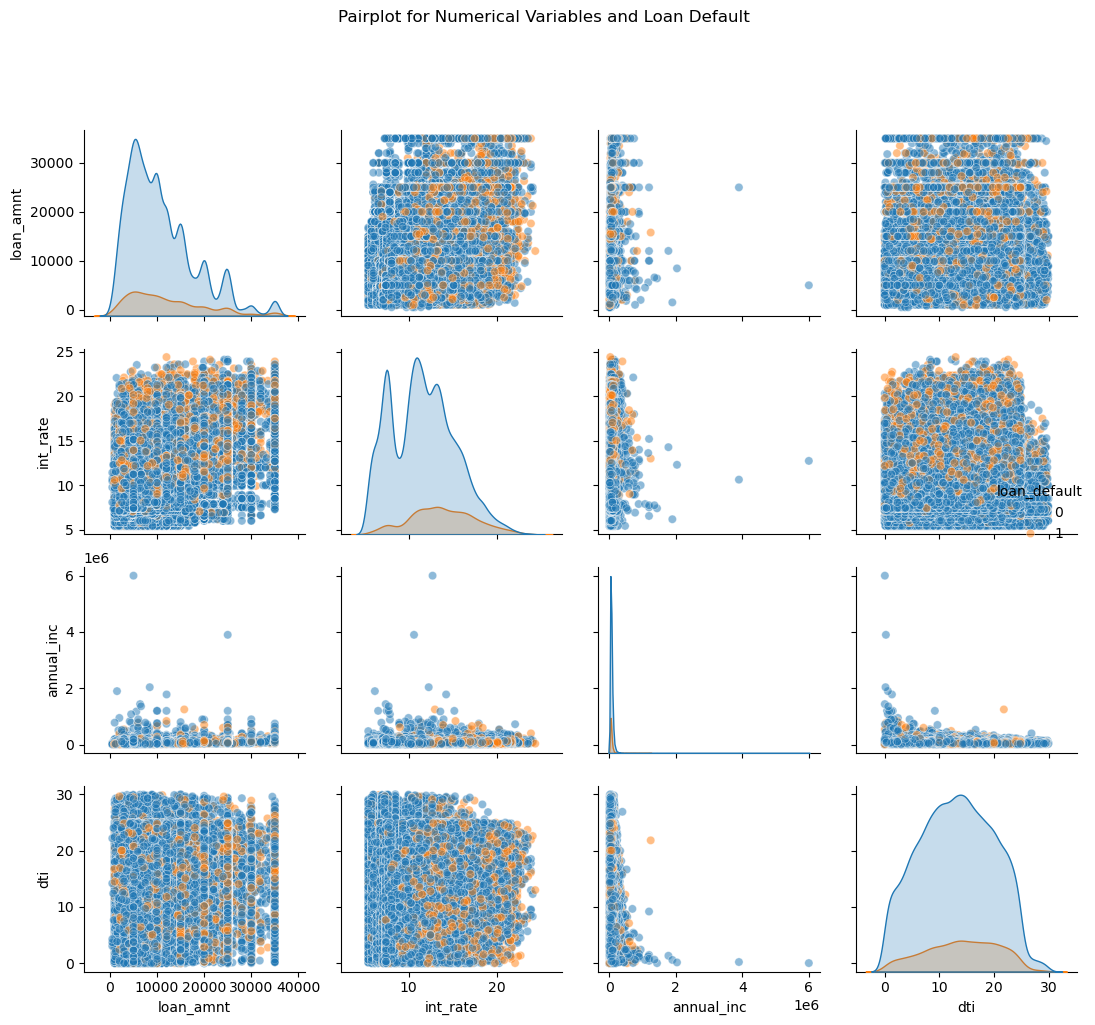

In [103]:
# Pairplot for numerical variables colored by loan default
pair_plot = sns.pairplot(df_for_loan[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_default']], hue='loan_default', diag_kind='kde', plot_kws={'alpha': 0.5})
pair_plot.fig.suptitle('Pairplot for Numerical Variables and Loan Default', y=1.02)


# Adjusting the layout to ensure title doesn't overlap
pair_plot.fig.tight_layout()
pair_plot.fig.subplots_adjust(top=0.9)
plt.show()

### After having analyzed the above pair plot, we have come across the below given findings -

### Loan Amount: Most loans disbursed are in lower amounts (below 20,000), with few visible patterns regarding default for higher loan amounts.
### Interest Rate: There is a clear indication that higher interest rates causes the maximum defaults. Borrowers with loans in higher interest rates tend to have a higher chances to default.
### Annual Income: Most of the data is concentrated among borrowers with lower annual income, but a few outliers exist in the higher income brackets, which do not show much association with default.
### DTI: With increase in DTI, there are higher chnaces of default, especially in the medium-to-high DTI range.

### Create and Analyze DTI Categories

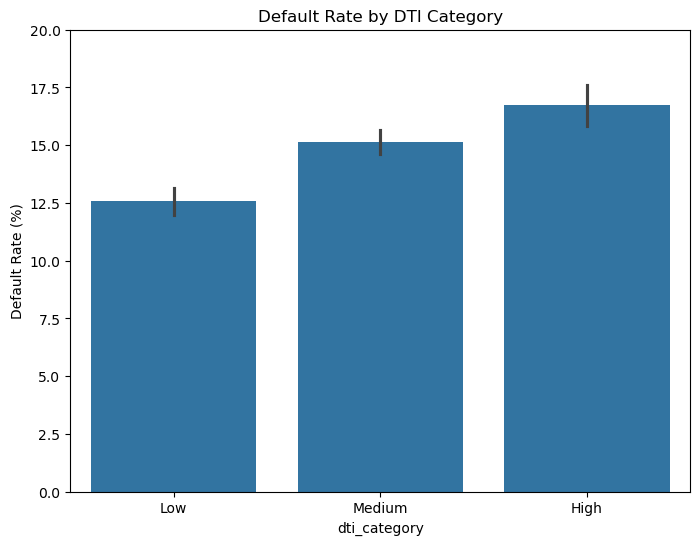

In [107]:
# Create categories for DTI
df_for_loan['dti_category'] = pd.cut(df_for_loan['dti'], bins=[0, 10, 20, 30], labels=['Low', 'Medium', 'High'])

# Plotting the default rates by DTI categories with percentages
plt.figure(figsize=(8, 6))
sns.barplot(x='dti_category', y='loan_default', data=df_for_loan, estimator=lambda x: sum(x) * 100.0 / len(x))
plt.title('Default Rate by DTI Category')
plt.ylabel('Default Rate (%)')  # Change the y-axis label to percentage
plt.ylim(0, 20)  # Set y-axis limits to match percentage scale
plt.show()

### The above plot do tell us the following -

### The load default rate increases from Low DTI to High DTI Category. 
### Borrowers with a higher debt-to-income ratio are more likely to default, which aligns with typical risk assessment in finance.
### It has been observed that High DTI has the highest default rate (around 17.5%), followed by Medium DTI (around 15%), and Low DTI (around 12%)



# Recommedation to the business

### Higher Interest Rates Signal Risk: There’s a moderate link between high interest rates and loan defaults. The company should be careful when issuing loans with higher interest rates and might need to tighten its lending criteria for applicants considered to be at higher risk.

### Keep an Eye on the Debt-to-Income (DTI) Ratio: Borrowers with a high DTI ratio are more likely to default on their loans. To mitigate this risk, the company should consider stricter standards for applicants with a high DTI, potentially denying loans or adjusting the terms for these borrowers.


### Improving Risk Models:

### Use DTI Categories: Including DTI categories in future risk assessments could help the company evaluate loan applicants more accurately. By separating applicants into groups based on their DTI—such as low, medium, or high-risk—the company can adjust its lending strategies to better fit each group’s risk level.

### Examine Income and Loan Outliers: Investigating unusual patterns in annual income and loan amounts could provide insights into the behaviors of borrowers who default versus those who don't default.

### Interest Rate Adjustments: The company should consider offering variable interest rates based on the risk profile of the borrower. For higher-risk applicants, either deny the loan or offer it at significantly higher interest rates with stricter repayment conditions.

### Income and Loan Defaults: Although the link between annual income and default rates is weak, borrowers with higher incomes tend to default less. A deeper analysis of income brackets may yield useful information for refining lending strategies.


In [118]:
print("Pandas version:", pd.__version__)

Pandas version: 2.0.3


In [119]:
print("SNS version:", sns.__version__)

SNS version: 0.13.2


In [122]:
print("Numpy version:", np.__version__)

Numpy version: 1.24.3


In [125]:
import matplotlib; print(matplotlib.__version__, matplotlib.__file__)

3.7.2 /Users/MG/anaconda3/lib/python3.11/site-packages/matplotlib/__init__.py
